In [146]:
import pandas as pd
import numpy as np
import pickle
import spacy
import time

In [148]:
import joblib

In [2]:
#!pip install spacy

In [3]:
#!python -m spacy download ru_core_news_lg

#### Checkpoint

In [4]:
#save_frame = pd.DataFrame({'text':t['text'],'OKPD2':t['OKPD2'],'1_step':t['1_step'],	'1.5_steps':t['1.5_steps'],	'2_steps':t['2_steps'],'3_steps':t['3_steps'],'4_steps':t['4_steps'] ,'embedding':emb_1, })

In [5]:
#save_frame.to_pickle("embeddings_33_45_81_86.pickle")

In [6]:
save_frame = pd.read_pickle("embeddings_1_17_33_45_58_81_86.pickle")

In [7]:
save_frame = save_frame[(save_frame['1_step']==1)|(save_frame['1_step']==17)|(save_frame['1_step']==33)]
save_frame.head()

text         OKPD2  1_step  1.5_steps  2_steps  \
0                    укроп свежий  01.13.19.000       1         11      113   
1                          яблоки  01.24.10.000       1         12      124   
2                капуста брокколи  01.13.13.000       1         11      113   
3                морковь столовая  01.13.41.110       1         11      113   
4  яйца куриные в скорлупе свежие  01.47.21.000       1         14      147   

   2.5_steps  3_steps   4_steps  \
0       1131    11319  11319000   
1       1241    12410  12410000   
2       1131    11313  11313000   
3       1134    11341  11341110   
4       1472    14721  14721000   

                                           embedding  
0  [0.3195403, -0.32790005, -0.06497962, 0.349259...  
1  [-0.20394225, -0.5428032, 0.17268088, -0.27738...  
2  [0.34785545, 0.1356812, 0.1781406, -0.40813398...  
3  [0.4754958, 0.10029624, 0.0036270898, 0.009132...  
4  [-0.34016472, -0.03254654, -0.046401866, 0.246...

In [8]:
save_frame.groupby('1_step')['text'].count()

1_step
1     243997
17    246177
33    246556
Name: text, dtype: int64

#### 1.5_steps

In [9]:
labels = save_frame['1.5_steps']

In [10]:
len(set(labels))

10

Разбиение выборки на train и test

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(list(save_frame['embedding']), labels, test_size=0.2, random_state=42)

Лог регрессия из sklearn

In [12]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()
model = LogisticRegression(multi_class='ovr', solver ='newton-cg' )
model.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 522.0162265300751 seconds ---


Построение ROC кривой

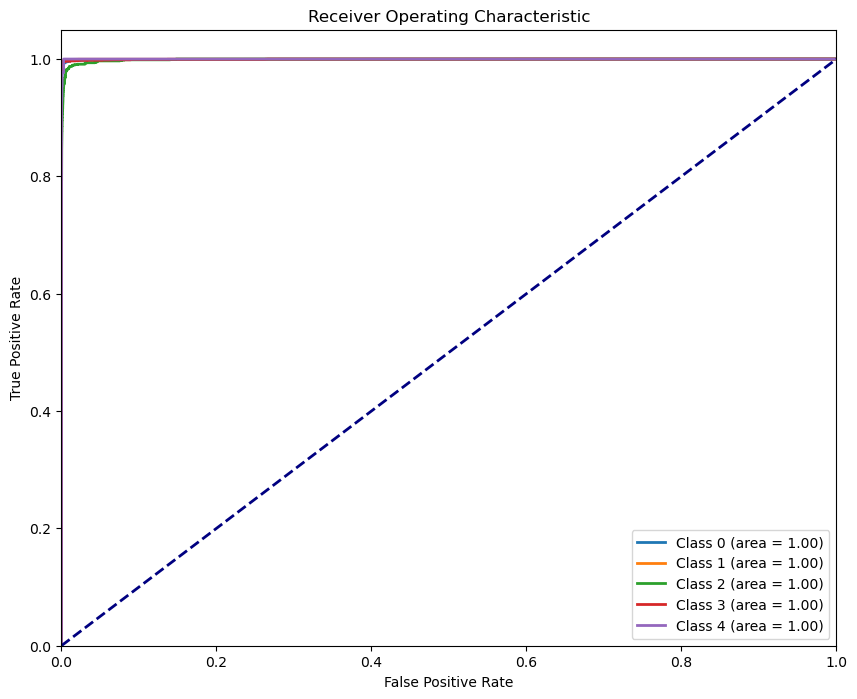

In [13]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Бинаризация меток для многоклассовой классификации
y_test_binarized = label_binarize(y_test, classes=np.unique(labels))

# Предсказание вероятностей для всех классов
y_score = model.predict_proba(X_test)

# Вычисление параметров ROC-кривых для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение ROC-кривых для всех классов
plt.figure(figsize=(10, 8))

classes_to_see = [0,1, 2, 3, 4]
for i in classes_to_see: # range(y_test_binarized.shape[1])
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {} (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



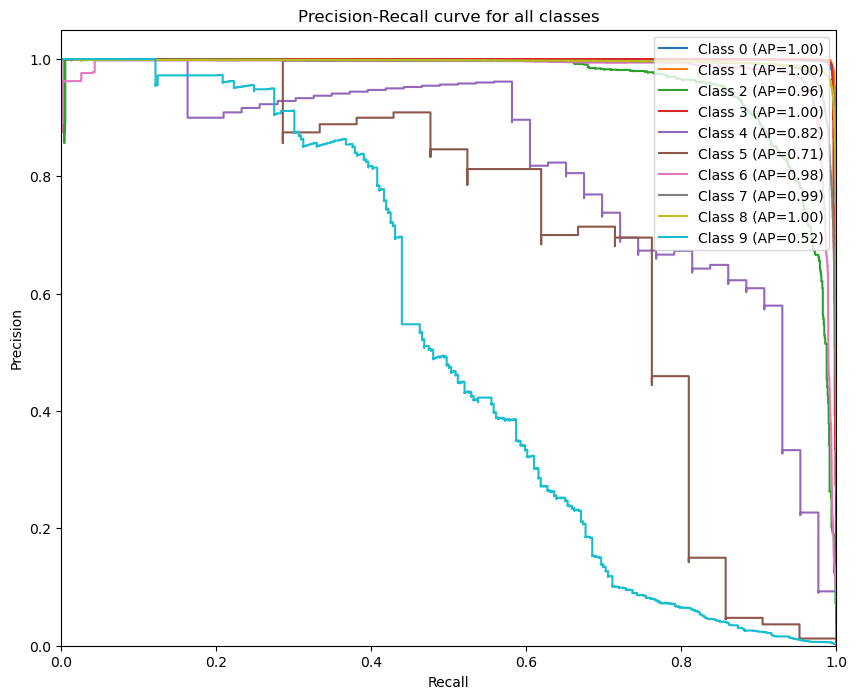

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Расчет кривых точности и полноты для каждого класса
precision = dict()
recall = dict()
average_precision = dict()
for i in range(y_test_binarized.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

# Построение графиков кривых точности-полноты для всех классов
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    plt.step(recall[i], precision[i], where='post', 
             label='Class {} (AP={:.2f})'.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for all classes')
plt.legend(loc="upper right")
plt.show()


In [15]:
model_classes = model.classes_
print(model_classes)

[ 11  12  13  14  16  17 171 172 331 332]


In [16]:
t = save_frame

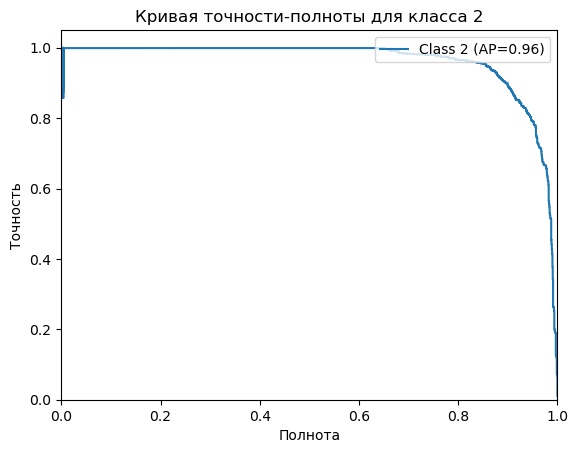

In [73]:
plt.figure()
plt.step(recall[2], precision[2], where='post', 
             label='Class {} (AP={:.2f})'.format(2, average_precision[2]))

plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая точности-полноты для класса %d' % class_number)
plt.legend(loc="upper right")
plt.show()

#### 2_steps

In [17]:
labels2 = save_frame['2_steps']

In [18]:
len(set(labels2))

30

In [19]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(list(save_frame['embedding']), labels2, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
model2 = LogisticRegression(multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model2.fit(X_train2, y_train2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1672.0982377529144 seconds ---


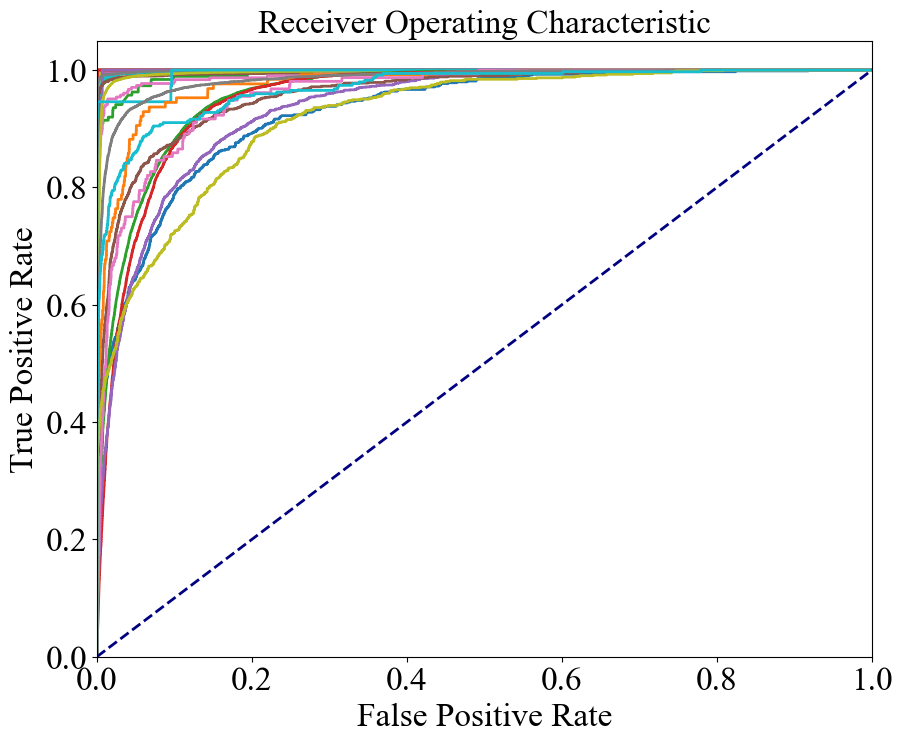

In [144]:
# Бинаризация меток для многоклассовой классификации
y_test_binarized2 = label_binarize(y_test2, classes=np.unique(labels2))

# Предсказание вероятностей для всех классов
y_score2 = model2.predict_proba(X_test2)

# Вычисление параметров ROC-кривых для каждого класса
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in range(y_test_binarized2.shape[1]):
    fpr2[i], tpr2[i], _ = roc_curve(y_test_binarized2[:, i], y_score2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Построение ROC-кривых для всех классов
plt.figure(figsize=(10, 8))

#classes_to_see2 = [0,1, 2, 3, 4]
for i in range(y_test_binarized2.shape[1]): # classes_to_see2
    plt.plot(fpr2[i], tpr2[i], lw=2, label='Class {} (area = {:.2f})'.format(i, roc_auc2[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
#plt.legend(loc="lower right")
plt.show()



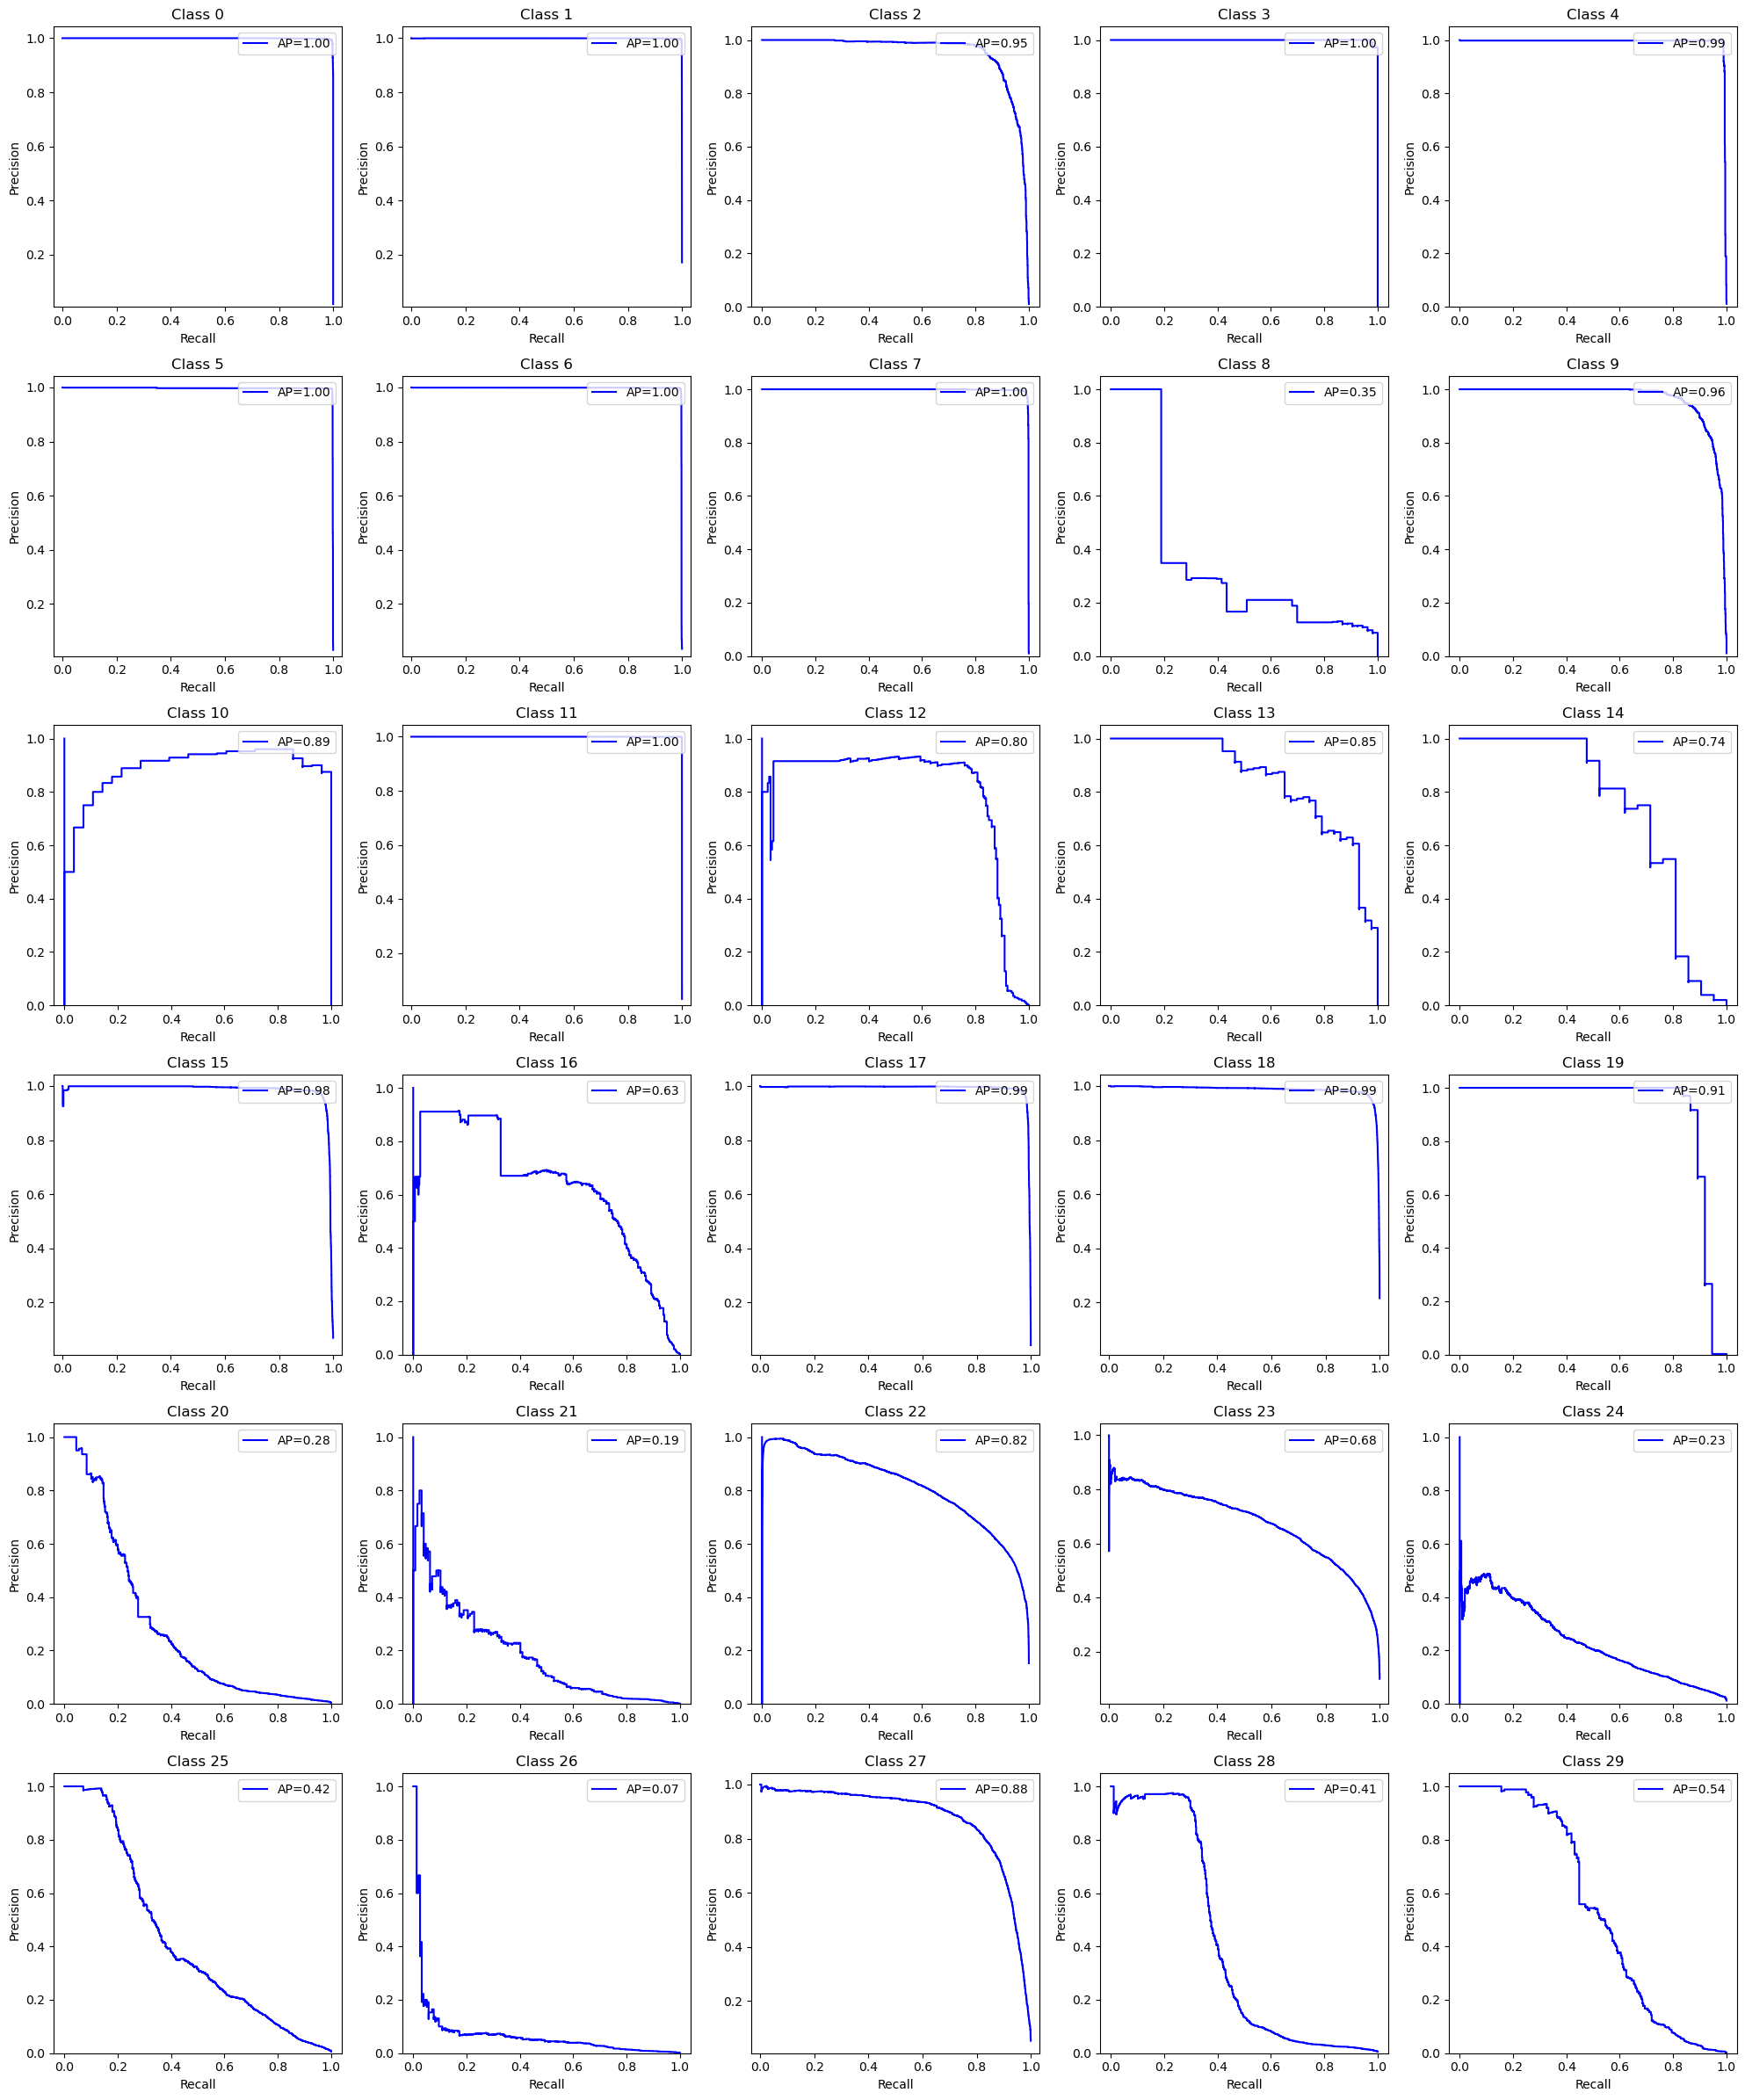

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Предполагается, что y_test_binarized и y_score уже вычислены
n_classes2 = y_test_binarized2.shape[1]  # количество классов

# Инициализация словарей
precision2 = dict()
recall2 = dict()
average_precision2 = dict()

# Расчет точности и полноты для каждого класса
for i in range(n_classes2):
    precision2[i], recall2[i], _ = precision_recall_curve(y_test_binarized2[:, i], y_score2[:, i])
    average_precision2[i] = average_precision_score(y_test_binarized2[:, i], y_score2[:, i])

# Выбор размера сетки подграфиков в зависимости от количества классов
rows2 = int(np.ceil(n_classes2 / 5))  # Допустим, мы хотим до 6 графиков в ряд
cols2 = 5

# Создание фигуры для подграфиков
figsize_per_subplot2 = 4  # Задаем желаемую ширину и высоту каждого подграфика
fig2, axes2 = plt.subplots(rows2, cols2, figsize=(figsize_per_subplot2 * cols2, figsize_per_subplot2 * rows2))

for i, ax in enumerate(axes2.flatten()):
    if i < n_classes2:
        ax.step(recall2[i], precision2[i], where='post', color='b', label=f'AP={average_precision2[i]:.2f}')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.0])
        ax.set_title(f'Class {i}')
        ax.legend(loc="upper right")
        ax.set_aspect('equal', adjustable='datalim')
    else:
        ax.set_visible(False)  # Скрываем лишние подграфики, если они есть

# Если количество классов не заполняет всю сетку, остальные подграфики можно очистить
for i in range(n_classes2, rows2 * cols2):
    fig2.delaxes(axes2.flatten()[i])

plt.tight_layout()
plt.show()


In [23]:
save_frame['predicted_2_steps'] = save_frame['embedding'].apply(lambda em: model2.predict([em]) )
save_frame['predicted_2_steps'] = save_frame['predicted_2_steps'].apply(lambda x: int(str(x)[1:-1]))
save_frame.head()

text         OKPD2  1_step  1.5_steps  2_steps  \
0                    укроп свежий  01.13.19.000       1         11      113   
1                          яблоки  01.24.10.000       1         12      124   
2                капуста брокколи  01.13.13.000       1         11      113   
3                морковь столовая  01.13.41.110       1         11      113   
4  яйца куриные в скорлупе свежие  01.47.21.000       1         14      147   

   2.5_steps  3_steps   4_steps  \
0       1131    11319  11319000   
1       1241    12410  12410000   
2       1131    11313  11313000   
3       1134    11341  11341110   
4       1472    14721  14721000   

                                           embedding  predicted_2_steps  
0  [0.3195403, -0.32790005, -0.06497962, 0.349259...                113  
1  [-0.20394225, -0.5428032, 0.17268088, -0.27738...                124  
2  [0.34785545, 0.1356812, 0.1781406, -0.40813398...                113  
3  [0.4754958, 0.10029624, 0.0036270898, 0.009132...                113  
4  [-0.34016472, -0.03254654, -0.046401866, 0.246...                147

In [24]:
print(save_frame[save_frame['2_steps']!=save_frame['predicted_2_steps']].shape)
save_frame[save_frame['2_steps']!=save_frame['predicted_2_steps']].groupby('2_steps')['text'].count()

(89441, 10)


2_steps
111        89
113       308
119      1082
121         7
122       123
123       126
124       152
125        59
128       188
130      1011
141        12
147        52
149       192
161        87
170        63
1712     2285
1721      692
1722      792
1723     3889
1724       20
1729     3043
3311      528
3312    20826
3313    30038
3314     8516
3315     3816
3316      726
3317     6795
3319     2881
3320     1043
Name: text, dtype: int64

#### 2.5_steps

In [25]:
labels3 = t['2.5_steps']

In [26]:
len(set(labels3))

52

In [27]:
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(list(save_frame['embedding']), labels3, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
model3 = LogisticRegression(multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model3.fit(X_train3, y_train3)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2817.3539888858795 seconds ---


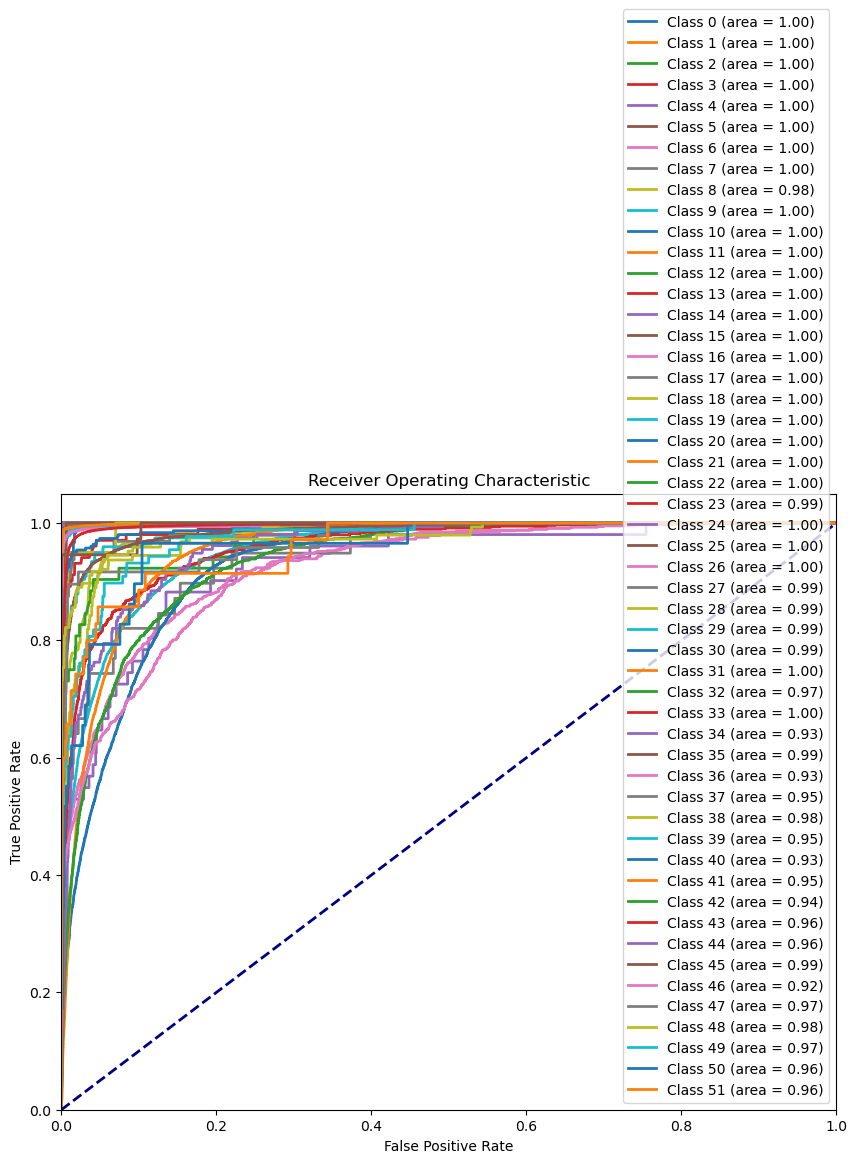

In [29]:
# Бинаризация меток для многоклассовой классификации
y_test_binarized3 = label_binarize(y_test3, classes=np.unique(labels3))

# Предсказание вероятностей для всех классов
y_score3 = model3.predict_proba(X_test3)

# Вычисление параметров ROC-кривых для каждого класса
fpr3 = dict()
tpr3 = dict()
roc_auc3 = dict()
for i in range(y_test_binarized3.shape[1]):
    fpr3[i], tpr3[i], _ = roc_curve(y_test_binarized3[:, i], y_score3[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])

# Построение ROC-кривых для всех классов
plt.figure(figsize=(10, 8))

#classes_to_see2 = [0,1, 2, 3, 4]
for i in range(y_test_binarized3.shape[1]): # classes_to_see2
    plt.plot(fpr3[i], tpr3[i], lw=2, label='Class {} (area = {:.2f})'.format(i, roc_auc3[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

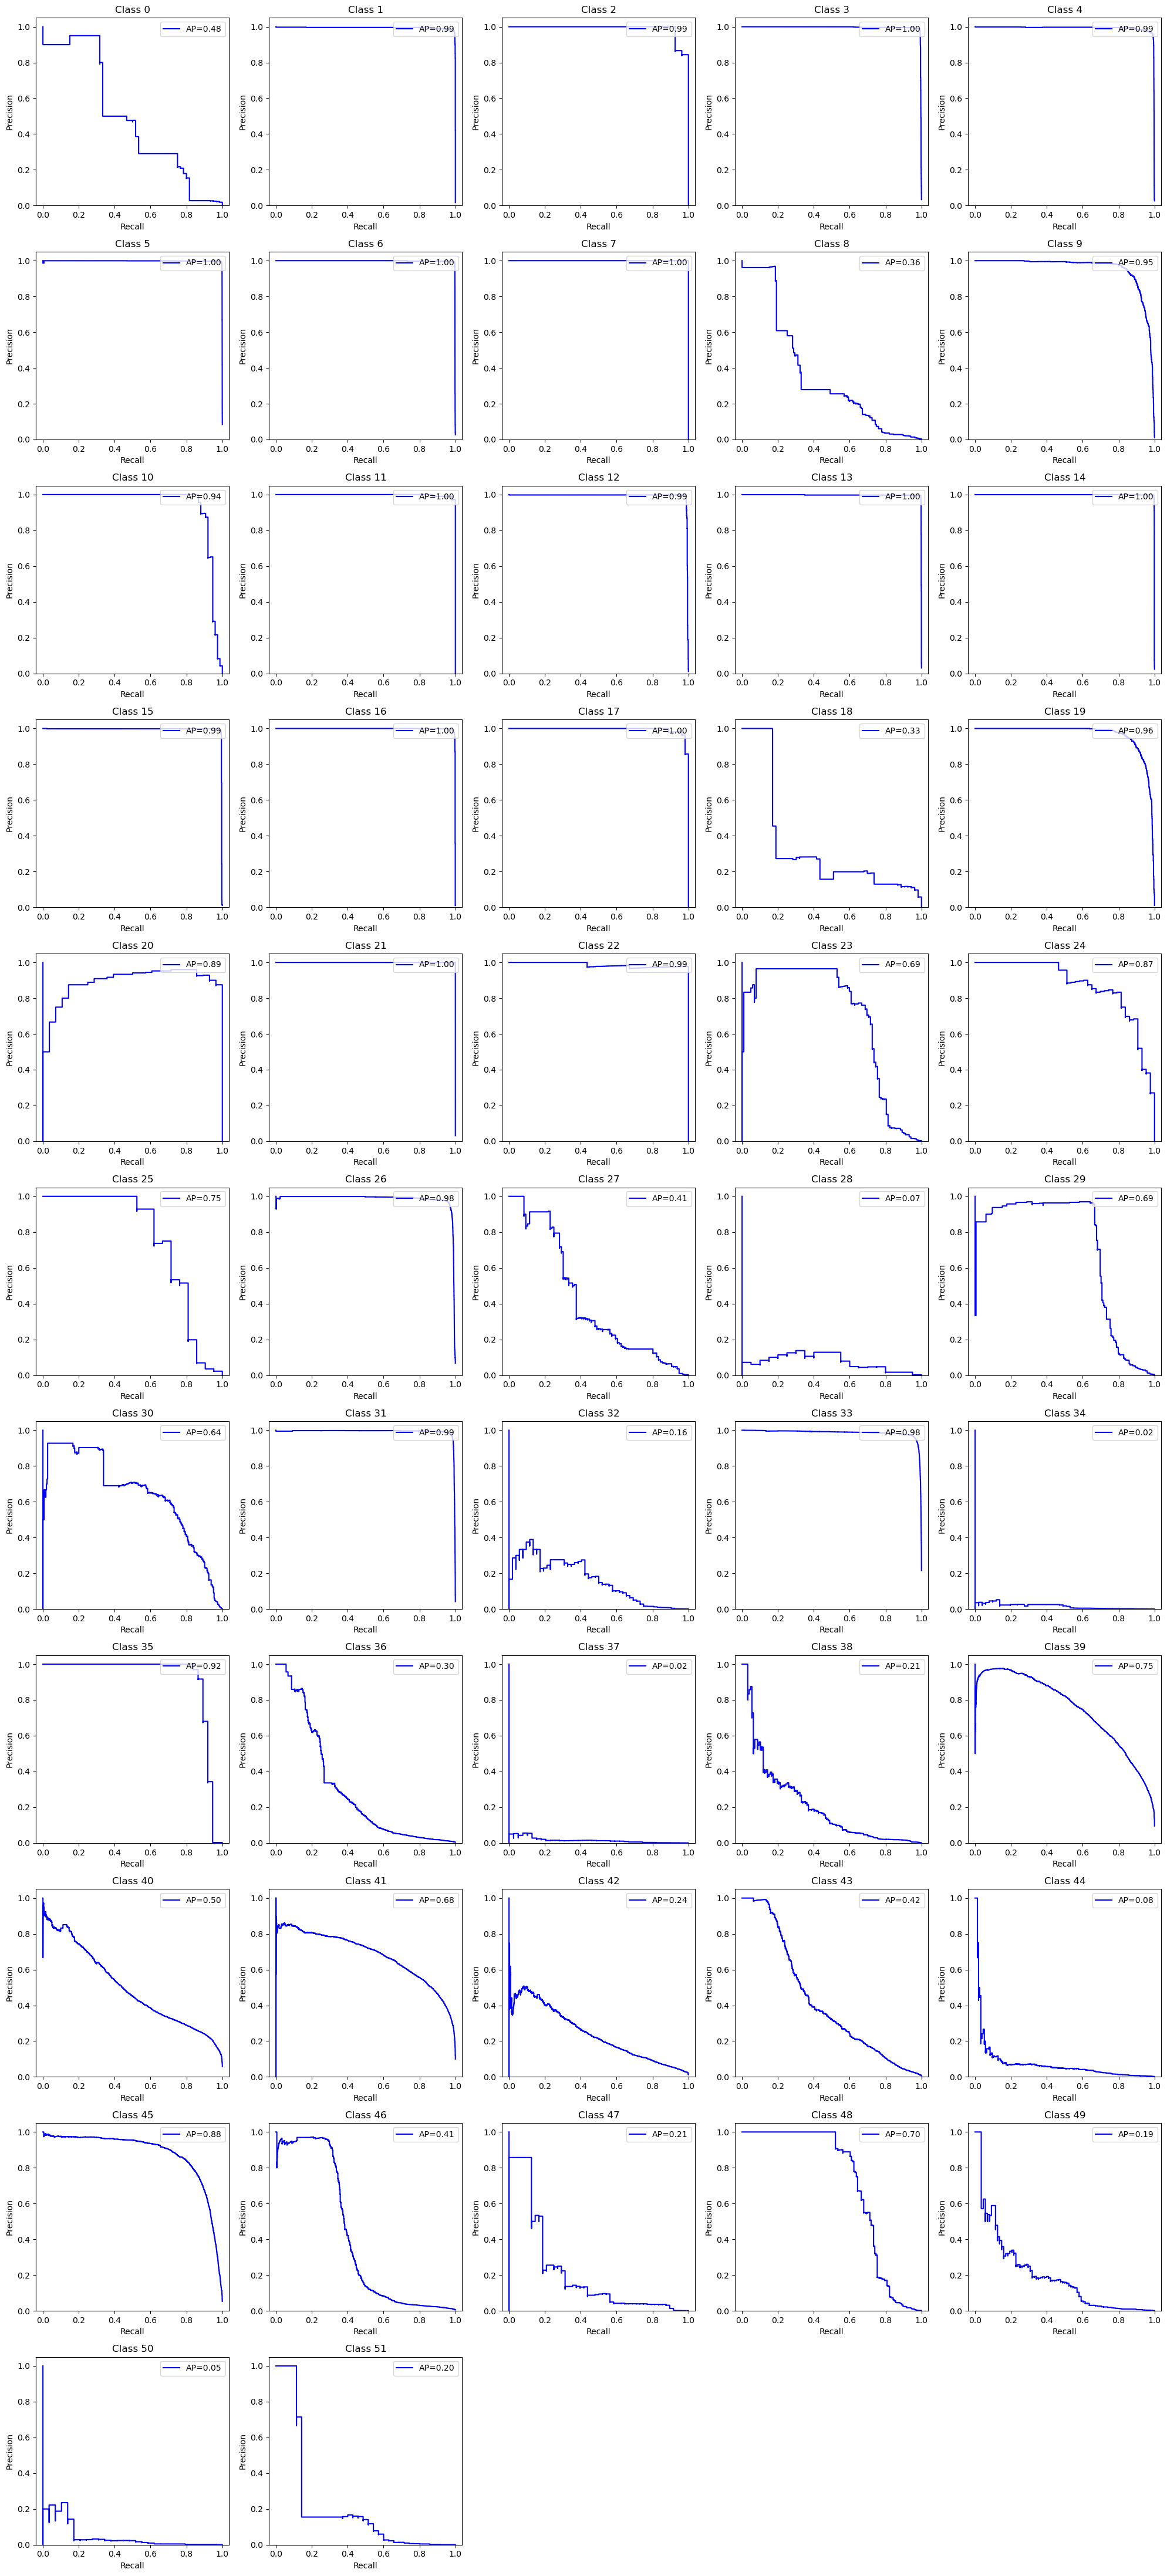

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Предполагается, что y_test_binarized и y_score уже вычислены
n_classes3 = y_test_binarized3.shape[1]  # количество классов

# Инициализация словарей
precision3 = dict()
recall3 = dict()
average_precision3 = dict()

# Расчет точности и полноты для каждого класса
for i in range(n_classes3):
    precision3[i], recall3[i], _ = precision_recall_curve(y_test_binarized3[:, i], y_score3[:, i])
    average_precision3[i] = average_precision_score(y_test_binarized3[:, i], y_score3[:, i])

# Выбор размера сетки подграфиков в зависимости от количества классов
rows3 = int(np.ceil(n_classes3 / 5))  # Допустим, мы хотим до 6 графиков в ряд
cols3 = 5

# Создание фигуры для подграфиков
figsize_per_subplot3 = 4  # Задаем желаемую ширину и высоту каждого подграфика
fig3, axes3 = plt.subplots(rows3, cols3, figsize=(figsize_per_subplot3 * cols3, figsize_per_subplot3 * rows3))

for i, ax in enumerate(axes3.flatten()):
    if i < n_classes3:
        ax.step(recall3[i], precision3[i], where='post', color='b', label=f'AP={average_precision3[i]:.2f}')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.0])
        ax.set_title(f'Class {i}')
        ax.legend(loc="upper right")
        ax.set_aspect('equal', adjustable='datalim')
    else:
        ax.set_visible(False)  # Скрываем лишние подграфики, если они есть

# Если количество классов не заполняет всю сетку, остальные подграфики можно очистить
for i in range(n_classes3, rows3 * cols3):
    fig3.delaxes(axes3.flatten()[i])

plt.tight_layout()
plt.show()


In [31]:
model_classes = model3.classes_


**смотрим почему плохо с 18,28,32,37,38,44,49,50,51**

  - 18, 28, 32, 37, 50, 51 - мало данных (<=300 записей)
  - 38 - очень спецефичные тексты про приводы итд..
  - 44 - ужасные тексты, он одно слово знает там
  - 49 аналогично

In [32]:
x = model_classes[44]
x

33161

In [33]:
save_frame[save_frame['2.5_steps']==x]

text         OKPD2  \
3842127          апд-30а автоматическая панель запуска всу  33.16.10.000   
3842214                     фара посадочно-рулёжная апрф-1  33.16.10.000   
3842243                                        дтпр датчик  33.16.10.000   
3843138                                     датчик дат-5ка  33.16.10.000   
3843473                          бр-022 (6с4.568.022) блок  33.16.10.000   
...                                                    ...           ...   
4090863              грунт выравнивающий alumigrip 10р30-8  33.16.10.000   
4091161                                        ссп-фк блок  33.16.10.000   
4091162                                        бкш-76 блок  33.16.10.000   
4091577                                 2туэ-4к измеритель  33.16.10.000   
4091970  1.7601.6105.030.002 электрокран слива конденса...  33.16.10.000   

         1_step  1.5_steps  2_steps  2.5_steps  3_steps    4_steps  \
3842127      33        331     3316      33161   331610  331610000   
3842214      33        331     3316      33161   331610  331610000   
3842243      33        331     3316      33161   331610  331610000   
3843138      33        331     3316      33161   331610  331610000   
3843473      33        331     3316      33161   331610  331610000   
...         ...        ...      ...        ...      ...        ...   
4090863      33        331     3316      33161   331610  331610000   
4091161      33        331     3316      33161   331610  331610000   
4091162      33        331     3316      33161   331610  331610000   
4091577      33        331     3316      33161   331610  331610000   
4091970      33        331     3316      33161   331610  331610000   

                                                 embedding  predicted_2_steps  
3842127  [0.106243156, -0.06412424, -0.06635783, -0.375...               3313  
3842214  [0.0686423, 0.045390602, 0.07686475, -0.111805...               3317  
3842243  [0.22548692, 0.22833014, -0.3128056, -0.119968...               3312  
3843138  [0.22548692, 0.22833014, -0.3128056, -0.119968...               3312  
3843473  [0.033243712, 0.057383895, -0.0034966425, -0.0...               1723  
...                                                    ...                ...  
4090863  [0.009373338, -0.06931312, -0.0065362207, -0.0...               3317  
4091161  [0.22233431, 0.3330304, -0.030041358, -0.02513...               3313  
4091162  [0.08310928, 0.14345974, -0.008741606, -0.1537...               1723  
4091577  [-0.14169647, 0.074048266, -0.043732256, -0.02...               3313  
4091970  [-0.034923136, -0.09521415, 0.015810559, 8.983...               3312  

[743 rows x 10 columns]

In [34]:
save_frame['predicted_2.5_steps'] = save_frame['embedding'].apply(lambda em: model3.predict([em]) )


In [35]:
save_frame['predicted_2.5_steps'] = save_frame['predicted_2.5_steps'].apply(lambda x: int(str(x)[1:-1]))
save_frame

text         OKPD2  \
0                                             укроп свежий  01.13.19.000   
1                                                   яблоки  01.24.10.000   
2                                         капуста брокколи  01.13.13.000   
3                                         морковь столовая  01.13.41.110   
4                           яйца куриные в скорлупе свежие  01.47.21.000   
...                                                    ...           ...   
4092102               ап-т квч трехчастотный 161310 (2010)  33.13.12.000   
4092103  услуга по замене (работа) единицы оборудования...  33.12.29.900   
4092104  техническое обслуживание и ремонт систем контр...  33.12.19.000   
4092105  услуги технического сопровождения систем бумаж...  33.12.16.000   
4092106                                   рукоятка передач  33.17.19.000   

         1_step  1.5_steps  2_steps  2.5_steps  3_steps    4_steps  \
0             1         11      113       1131    11319   11319000   
1             1         12      124       1241    12410   12410000   
2             1         11      113       1131    11313   11313000   
3             1         11      113       1134    11341   11341110   
4             1         14      147       1472    14721   14721000   
...         ...        ...      ...        ...      ...        ...   
4092102      33        331     3313      33131   331312  331312000   
4092103      33        331     3312      33122   331229  331229900   
4092104      33        331     3312      33121   331219  331219000   
4092105      33        331     3312      33121   331216  331216000   
4092106      33        331     3317      33171   331719  331719000   

                                                 embedding  predicted_2_steps  \
0        [0.3195403, -0.32790005, -0.06497962, 0.349259...                113   
1        [-0.20394225, -0.5428032, 0.17268088, -0.27738...                124   
2        [0.34785545, 0.1356812, 0.1781406, -0.40813398...                113   
3        [0.4754958, 0.10029624, 0.0036270898, 0.009132...                113   
4        [-0.34016472, -0.03254654, -0.046401866, 0.246...                147   
...                                                    ...                ...   
4092102  [-0.016549775, -0.09976013, 0.0001532634, -0.0...               3312   
4092103  [0.076836, 0.0043391306, -0.07767383, -0.07636...               3312   
4092104  [0.058661614, -0.11064894, -0.17567627, 0.0260...               3312   
4092105  [-0.013584461, -0.109105244, -0.0005458418, -0...               3312   
4092106  [-0.117982775, -0.029683799, -0.3264083, -0.22...               3317   

         predicted_2.5_steps  
0                       1131  
1                       1241  
2                       1131  
3                       1134  
4                       1472  
...                      ...  
4092102                33171  
4092103                33122  
4092104                33122  
4092105                33121  
4092106                33171  

[736730 rows x 11 columns]

In [36]:
print(save_frame[save_frame['2.5_steps']!=save_frame['predicted_2.5_steps']].shape)
save_frame[save_frame['2.5_steps']!=save_frame['predicted_2.5_steps']].groupby('2.5_steps')['text'].count()

(105357, 11)


2.5_steps
1116       193
1117        94
1119         5
1131       307
1133       216
1134       291
1135       132
1138         2
1139       846
1192      1012
1193        43
1211         8
1221       118
1231       111
1241       122
1242        78
1251        52
1253         8
1281       188
1301       901
1412        12
1472        48
1491        11
1492       155
1611        69
1701        57
17121     1963
17124      269
17125      120
17127      326
17211      652
17221      665
17229      245
17231     3543
17239      245
17241       20
17291     2888
17299      187
33111      524
33121    19796
33122    27567
33131    18825
33141     8223
33151     3732
33161      723
33171     5758
33191     2828
33202      238
33203      295
33204      381
33205      101
33207      164
Name: text, dtype: int64

#### 3_steps

In [37]:
save_frame.head()

text         OKPD2  1_step  1.5_steps  2_steps  \
0                    укроп свежий  01.13.19.000       1         11      113   
1                          яблоки  01.24.10.000       1         12      124   
2                капуста брокколи  01.13.13.000       1         11      113   
3                морковь столовая  01.13.41.110       1         11      113   
4  яйца куриные в скорлупе свежие  01.47.21.000       1         14      147   

   2.5_steps  3_steps   4_steps  \
0       1131    11319  11319000   
1       1241    12410  12410000   
2       1131    11313  11313000   
3       1134    11341  11341110   
4       1472    14721  14721000   

                                           embedding  predicted_2_steps  \
0  [0.3195403, -0.32790005, -0.06497962, 0.349259...                113   
1  [-0.20394225, -0.5428032, 0.17268088, -0.27738...                124   
2  [0.34785545, 0.1356812, 0.1781406, -0.40813398...                113   
3  [0.4754958, 0.10029624, 0.0036270898, 0.009132...                113   
4  [-0.34016472, -0.03254654, -0.046401866, 0.246...                147   

   predicted_2.5_steps  
0                 1131  
1                 1241  
2                 1131  
3                 1134  
4                 1472

In [38]:
labels4 = save_frame['3_steps']

In [39]:
len(set(labels4))

104

Классов очень много, ещё по прошлой ступени наблюдается жуткий дизбаланс классов, так что почистим их ещё раз, на основе предыдущей ступени и просто профильтруем чтобы были достаточные выборки

In [40]:
counts = save_frame.groupby('3_steps')['text'].count()
# Отфильтровываем группы с количеством записей меньше 300
filtered_groups = counts[counts >= 300].index

filtered_frame = save_frame[save_frame['3_steps'].isin(filtered_groups)]
filtered_frame.groupby('3_steps')['text'].count().sort_values()

3_steps
331410       330
172112       371
14919        392
12423        395
11931        410
           ...  
331229     32931
331719     39730
171214     49275
331312     60510
172313    145221
Name: text, Length: 68, dtype: int64

In [41]:
filtered_frame = filtered_frame[(filtered_frame['2.5_steps']!=33161)&(filtered_frame['2.5_steps']!=33204)]

In [42]:
t = filtered_frame

In [43]:
labels4 = filtered_frame['3_steps']
len(set(labels4))

66

In [44]:
from sklearn.model_selection import train_test_split

X_train4, X_test4, y_train4, y_test4 = train_test_split(list(filtered_frame['embedding']), labels4, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
model4 = LogisticRegression(multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model4.fit(X_train4, y_train4)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3493.274744272232 seconds ---


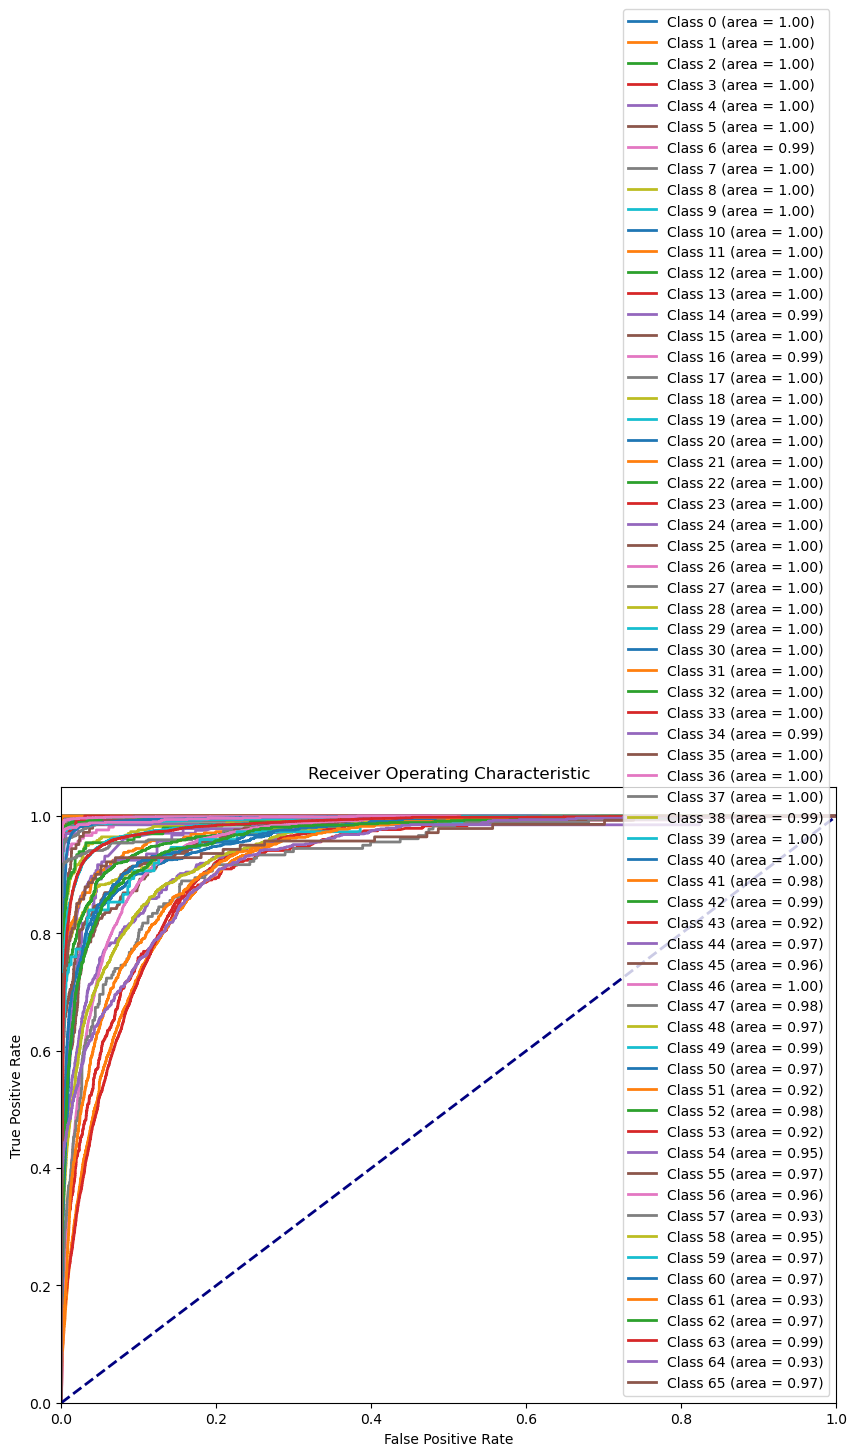

In [46]:
# Бинаризация меток для многоклассовой классификации
y_test_binarized4 = label_binarize(y_test4, classes=np.unique(labels4))

# Предсказание вероятностей для всех классов
y_score4= model4.predict_proba(X_test4)

# Вычисление параметров ROC-кривых для каждого класса
fpr4 = dict()
tpr4 = dict()
roc_auc4 = dict()
for i in range(y_test_binarized4.shape[1]):
    fpr4[i], tpr4[i], _ = roc_curve(y_test_binarized4[:, i], y_score4[:, i])
    roc_auc4[i] = auc(fpr4[i], tpr4[i])

# Построение ROC-кривых для всех классов
plt.figure(figsize=(10, 8))

#classes_to_see2 = [0,1, 2, 3, 4]
for i in range(y_test_binarized4.shape[1]): # classes_to_see2
    plt.plot(fpr4[i], tpr4[i], lw=2, label='Class {} (area = {:.2f})'.format(i, roc_auc4[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

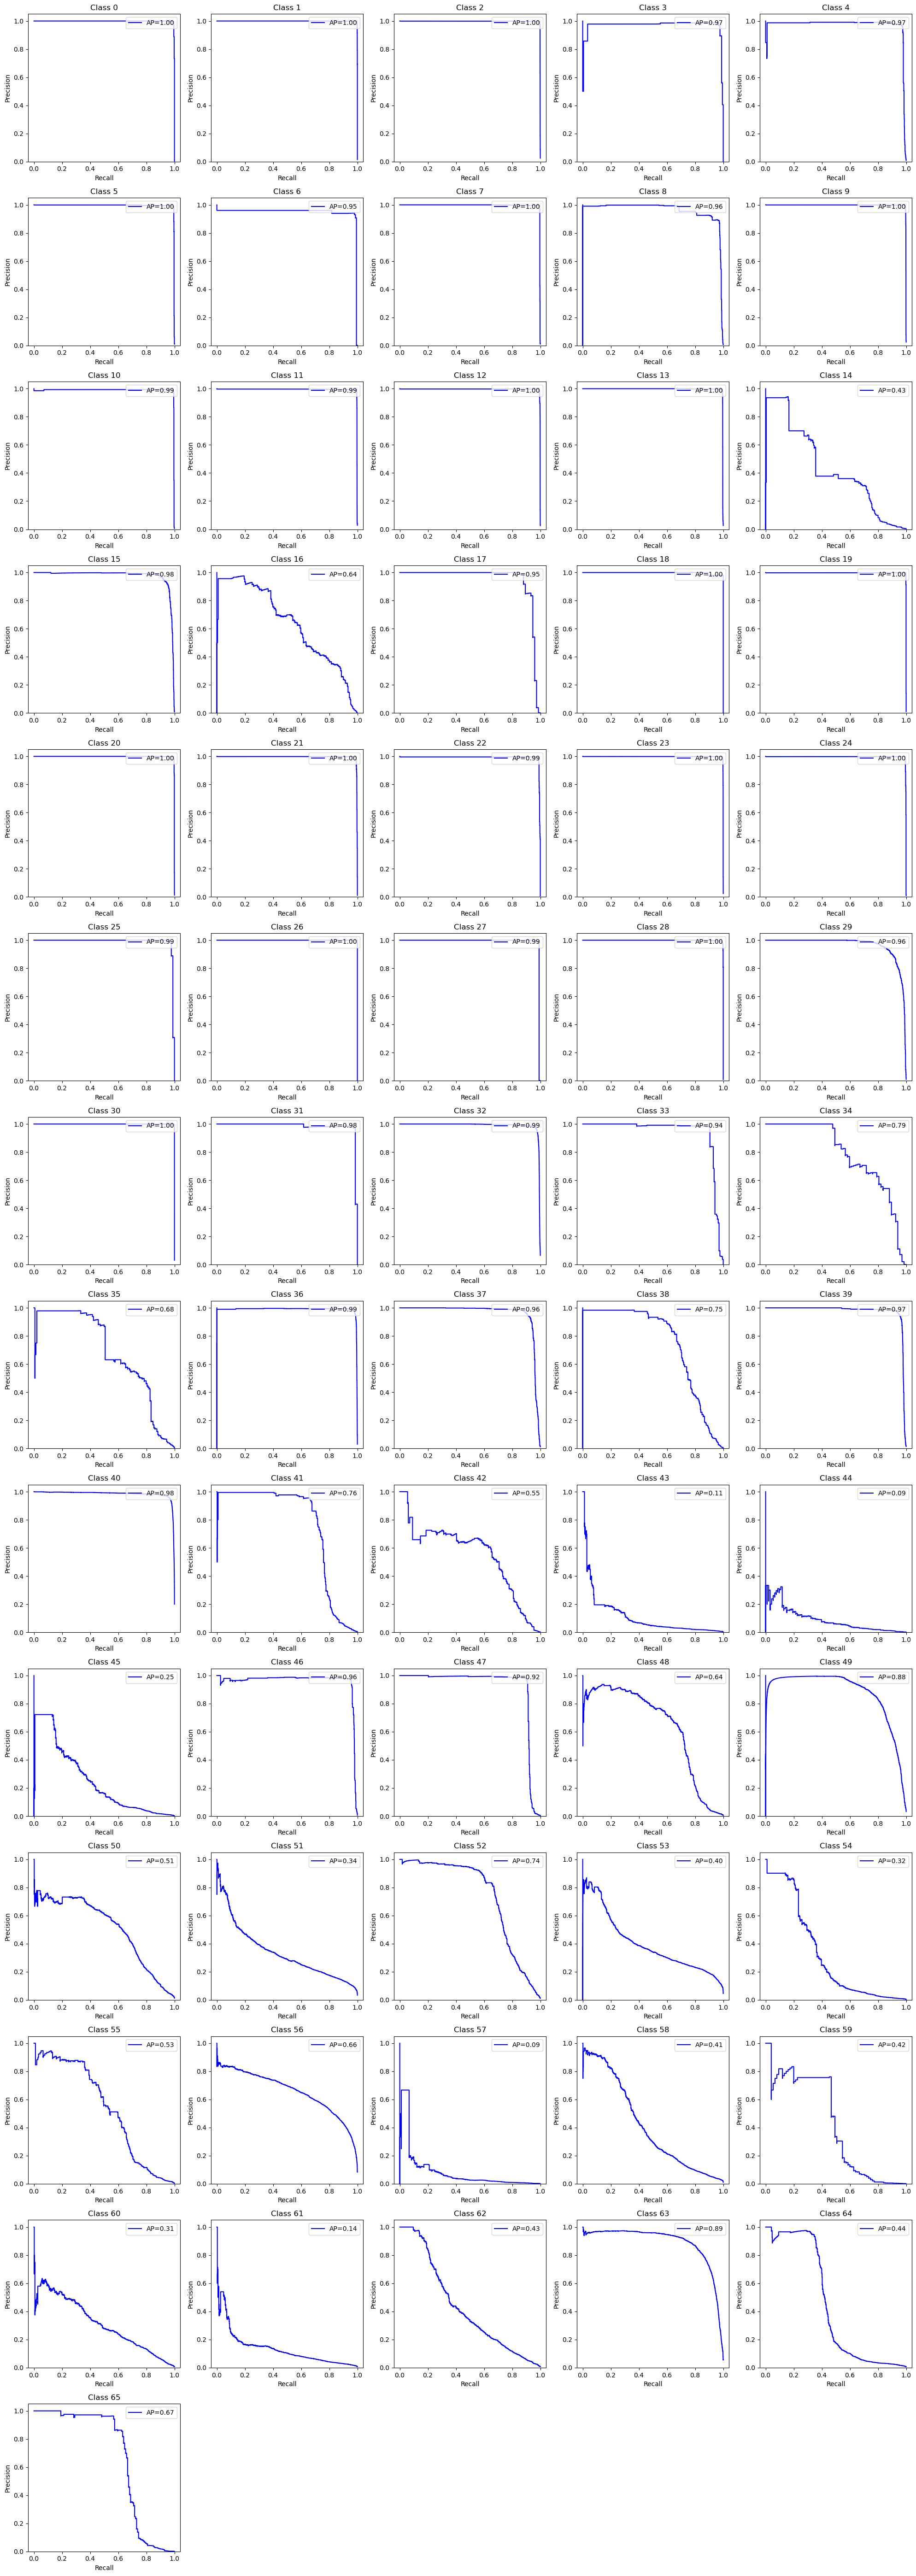

In [47]:
# Инициализация словарей
precision4 = dict()
recall4 = dict()
average_precision4 = dict()

n_classes4 = y_test_binarized4.shape[1]  # количество классов

# Расчет точности и полноты для каждого класса
for i in range(n_classes4):
    precision4[i], recall4[i], _ = precision_recall_curve(y_test_binarized4[:, i], y_score4[:, i])
    average_precision4[i] = average_precision_score(y_test_binarized4[:, i], y_score4[:, i])

# Выбор размера сетки подграфиков в зависимости от количества классов
rows4 = int(np.ceil(n_classes4 / 5))  # Допустим, мы хотим до 6 графиков в ряд
cols4 = 5

# Создание фигуры для подграфиков
figsize_per_subplot4 = 4  # Задаем желаемую ширину и высоту каждого подграфика
fig4, axes4 = plt.subplots(rows4, cols4, figsize=(figsize_per_subplot4 * cols4, figsize_per_subplot4 * rows4))

for i, ax in enumerate(axes4.flatten()):
    if i < n_classes4:
        ax.step(recall4[i], precision4[i], where='post', color='b', label=f'AP={average_precision4[i]:.2f}')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.0])
        ax.set_title(f'Class {i}')
        ax.legend(loc="upper right")
        ax.set_aspect('equal', adjustable='datalim')
    else:
        ax.set_visible(False)  # Скрываем лишние подграфики, если они есть

# Если количество классов не заполняет всю сетку, остальные подграфики можно очистить
for i in range(n_classes4, rows4 * cols4):
    fig4.delaxes(axes4.flatten()[i])

plt.tight_layout()
plt.show()

Давайте разберёмся почему некоторые классы прям настолько плохо классифицируются:  
  - 43 - 172919  - очень много "прочего" про бумагу
  - 44 - 331111 - плохие эмбеддинги + мало данных
  - 45 - тех обслуживание всего подряд, эмбеддинги ломаются на том что есть сковорода/кондиционер/холодильная витрина и всё это вместе + куча артикулов
  - 57 - оказание услуг по ремонту      331313 "Услуги по ремонту и техническому обслуживанию профессиональных оптических приборов и фотооборудования"
  - 60 - тоже окзание услуг по ремонту  331411 "Услуги по ремонту и техническому обслуживанию электродвигателей, генераторов, трансформаторов и распределительной и регулирующей аппаратуры для электричества"
  - 61 - тоже оказание услуг по ремонту 331419 "Услуги по ремонту и техническому обслуживанию прочего профессионального электрического оборудования"
Слабо различимы даже человеком 57-60-61

In [48]:
model_classes = model4.classes_
x = model_classes[57]
x

331313

In [49]:
save_frame[save_frame['3_steps']==x]

text         OKPD2  \
3843416  оказание услуги по ремонту медицинского издели...  33.13.13.000   
3843524                                     системный блок  33.13.13.000   
3843568  услуги по ремонту и техническому обслуживанию ...  33.13.13.000   
3843800                                           a-резина  33.13.13.000   
3843817  осмотр оборудования с целью сдачи-приемки сист...  33.13.13.000   
...                                                    ...           ...   
4090648  оказание услуг по техническому обслуживанию си...  33.13.13.000   
4090729                               аккумулятор 12 в, pb  33.13.13.000   
4091304  ремонт/замена разъема для видеонаблюдения сете...  33.13.13.000   
4091669                                       блок питания  33.13.13.000   
4092071  замена губки парковки 1 м910110 (в том числе г...  33.13.13.000   

         1_step  1.5_steps  2_steps  2.5_steps  3_steps    4_steps  \
3843416      33        331     3313      33131   331313  331313000   
3843524      33        331     3313      33131   331313  331313000   
3843568      33        331     3313      33131   331313  331313000   
3843800      33        331     3313      33131   331313  331313000   
3843817      33        331     3313      33131   331313  331313000   
...         ...        ...      ...        ...      ...        ...   
4090648      33        331     3313      33131   331313  331313000   
4090729      33        331     3313      33131   331313  331313000   
4091304      33        331     3313      33131   331313  331313000   
4091669      33        331     3313      33131   331313  331313000   
4092071      33        331     3313      33131   331313  331313000   

                                                 embedding  predicted_2_steps  \
3843416  [0.076209374, -0.011715519, -0.11487215, -0.08...               3313   
3843524  [-0.012916774, 0.13992777, 0.27366716, -0.1609...               3313   
3843568  [0.045743912, 0.01497197, -0.1805347, -0.04248...               3313   
3843800  [-0.17764364, -0.07684816, 0.15005447, -0.2209...               3313   
3843817  [0.07109466, -0.11938307, -0.19705449, -0.2060...               3312   
...                                                    ...                ...   
4090648  [0.18088926, 0.20768717, -0.08031923, -0.01121...               3312   
4090729  [0.012532028, -0.0837428, -0.12266143, -0.0835...               3313   
4091304  [0.013106, -0.09206755, -0.012953435, -0.07094...               3312   
4091669  [0.2825158, 0.04745917, -0.11460018, -0.378854...               3313   
4092071  [0.0140745165, -0.20837955, -0.075492024, -0.0...               3312   

         predicted_2.5_steps  
3843416                33131  
3843524                33131  
3843568                33131  
3843800                33131  
3843817                33122  
...                      ...  
4090648                33121  
4090729                33131  
4091304                33131  
4091669                33131  
4092071                33171  

[872 rows x 11 columns]

In [50]:
save_frame['predicted_3_steps'] = save_frame['embedding'].apply(lambda em: model4.predict([em]) )
save_frame['predicted_3_steps'] = save_frame['predicted_3_steps'].apply(lambda x: int(str(x)[1:-1]))
save_frame

text         OKPD2  \
0                                             укроп свежий  01.13.19.000   
1                                                   яблоки  01.24.10.000   
2                                         капуста брокколи  01.13.13.000   
3                                         морковь столовая  01.13.41.110   
4                           яйца куриные в скорлупе свежие  01.47.21.000   
...                                                    ...           ...   
4092102               ап-т квч трехчастотный 161310 (2010)  33.13.12.000   
4092103  услуга по замене (работа) единицы оборудования...  33.12.29.900   
4092104  техническое обслуживание и ремонт систем контр...  33.12.19.000   
4092105  услуги технического сопровождения систем бумаж...  33.12.16.000   
4092106                                   рукоятка передач  33.17.19.000   

         1_step  1.5_steps  2_steps  2.5_steps  3_steps    4_steps  \
0             1         11      113       1131    11319   11319000   
1             1         12      124       1241    12410   12410000   
2             1         11      113       1131    11313   11313000   
3             1         11      113       1134    11341   11341110   
4             1         14      147       1472    14721   14721000   
...         ...        ...      ...        ...      ...        ...   
4092102      33        331     3313      33131   331312  331312000   
4092103      33        331     3312      33122   331229  331229900   
4092104      33        331     3312      33121   331219  331219000   
4092105      33        331     3312      33121   331216  331216000   
4092106      33        331     3317      33171   331719  331719000   

                                                 embedding  predicted_2_steps  \
0        [0.3195403, -0.32790005, -0.06497962, 0.349259...                113   
1        [-0.20394225, -0.5428032, 0.17268088, -0.27738...                124   
2        [0.34785545, 0.1356812, 0.1781406, -0.40813398...                113   
3        [0.4754958, 0.10029624, 0.0036270898, 0.009132...                113   
4        [-0.34016472, -0.03254654, -0.046401866, 0.246...                147   
...                                                    ...                ...   
4092102  [-0.016549775, -0.09976013, 0.0001532634, -0.0...               3312   
4092103  [0.076836, 0.0043391306, -0.07767383, -0.07636...               3312   
4092104  [0.058661614, -0.11064894, -0.17567627, 0.0260...               3312   
4092105  [-0.013584461, -0.109105244, -0.0005458418, -0...               3312   
4092106  [-0.117982775, -0.029683799, -0.3264083, -0.22...               3317   

         predicted_2.5_steps  predicted_3_steps  
0                       1131              11319  
1                       1241              12410  
2                       1131              11313  
3                       1134              11341  
4                       1472              14721  
...                      ...                ...  
4092102                33171             331719  
4092103                33122             331229  
4092104                33122             331229  
4092105                33121             331216  
4092106                33171             331719  

[736730 rows x 12 columns]

In [51]:
print(save_frame[save_frame['3_steps']!=save_frame['predicted_3_steps']].shape)
save_frame[save_frame['3_steps']!=save_frame['predicted_3_steps']].groupby('3_steps')['text'].count()

(118890, 12)


3_steps
11161     108
11162     159
11171      26
11174     113
11175      40
         ... 
332029    239
332039    251
332042    436
332050    101
332070    171
Name: text, Length: 104, dtype: int64

#### 4_steps

In [52]:
labels5 = filtered_frame['4_steps']

In [53]:
from sklearn.model_selection import train_test_split

X_train5, X_test5, y_train5, y_test5 = train_test_split(list(filtered_frame['embedding']), labels5, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
model5 = LogisticRegression(multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model5.fit(X_train5, y_train5)
print("--- %s seconds ---" % (time.time() - start_time))

--- 5793.0055384635925 seconds ---


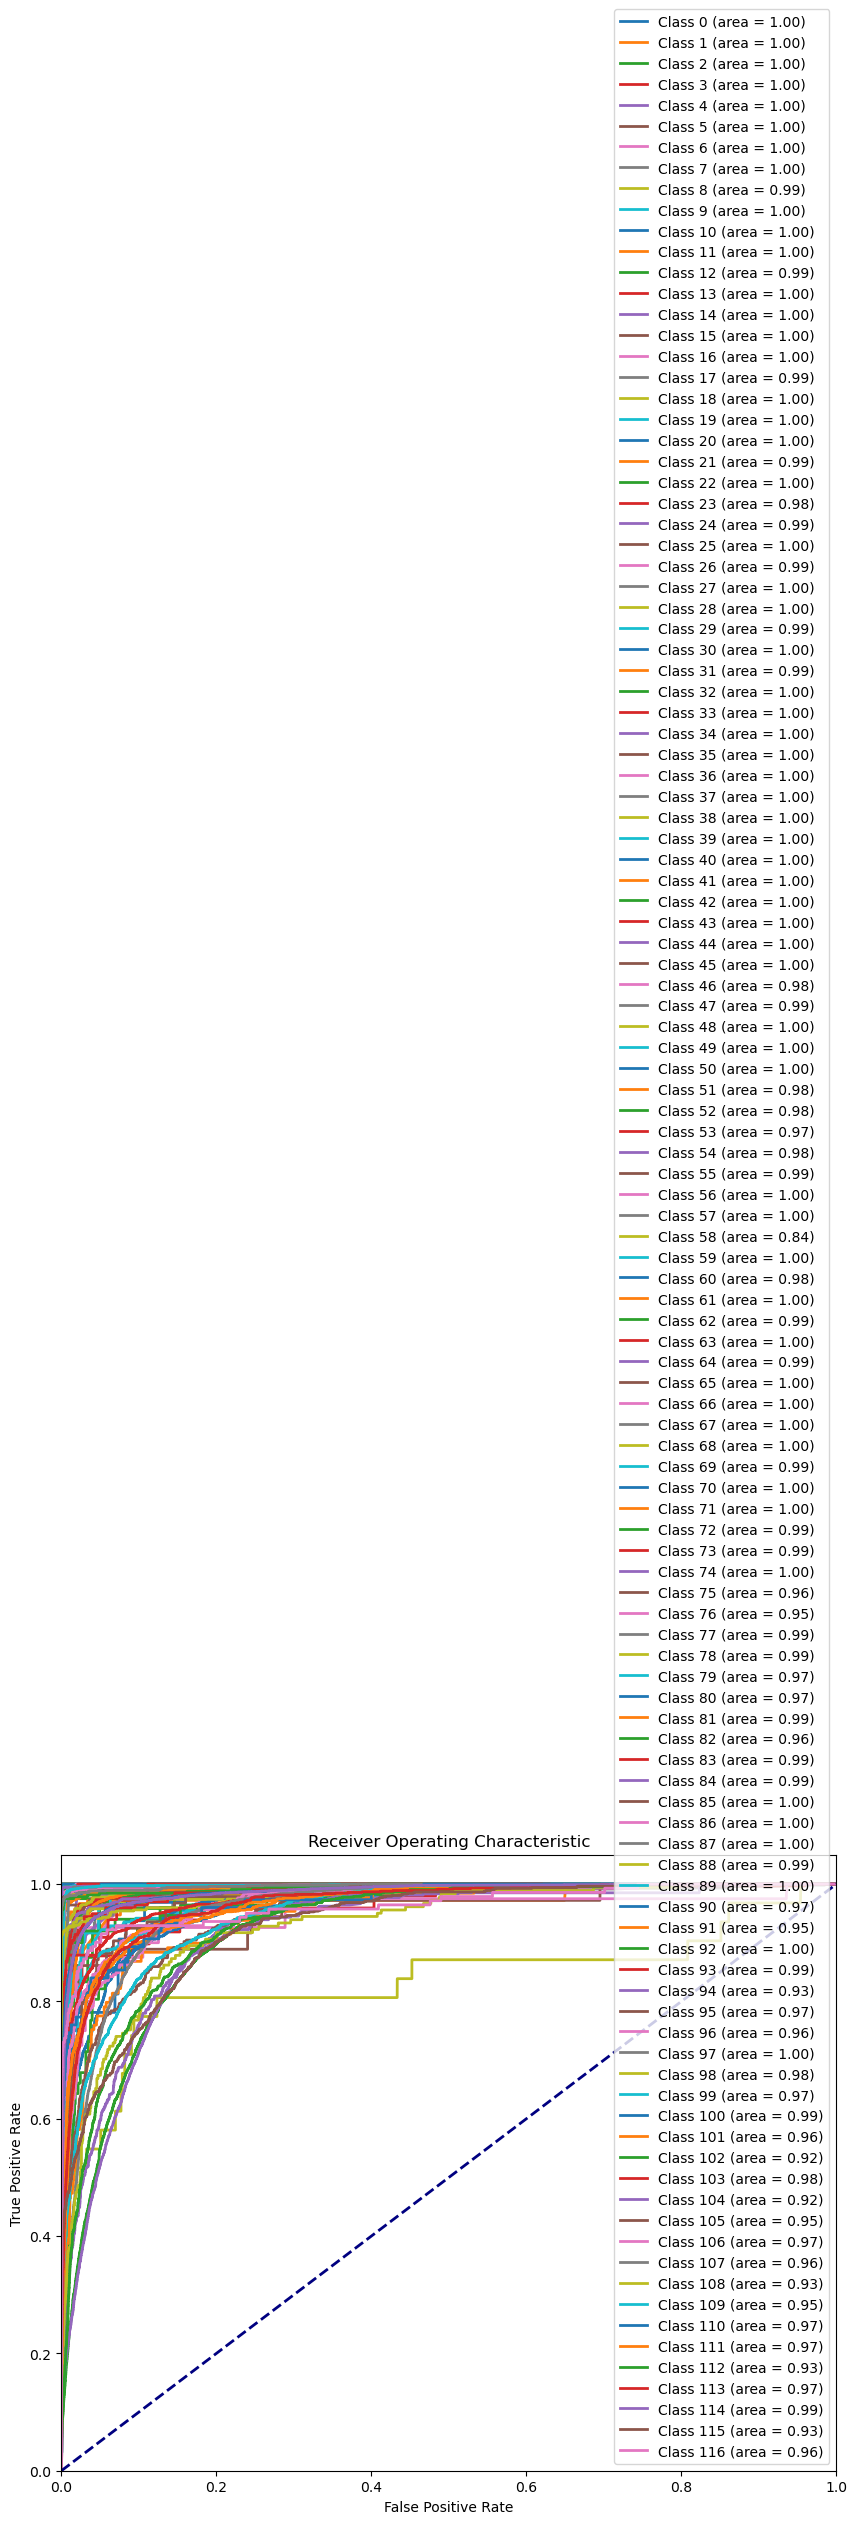

In [55]:
# Бинаризация меток для многоклассовой классификации
y_test_binarized5 = label_binarize(y_test5, classes=np.unique(labels5))

# Предсказание вероятностей для всех классов
y_score5= model5.predict_proba(X_test5)

# Вычисление параметров ROC-кривых для каждого класса
fpr5 = dict()
tpr5 = dict()
roc_auc5 = dict()
for i in range(y_test_binarized5.shape[1]):
    fpr5[i], tpr5[i], _ = roc_curve(y_test_binarized5[:, i], y_score5[:, i])
    roc_auc5[i] = auc(fpr5[i], tpr5[i])

# Построение ROC-кривых для всех классов
plt.figure(figsize=(10, 8))

#classes_to_see2 = [0,1, 2, 3, 5]
for i in range(y_test_binarized5.shape[1]): # classes_to_see2
    plt.plot(fpr5[i], tpr5[i], lw=2, label='Class {} (area = {:.2f})'.format(i, roc_auc5[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


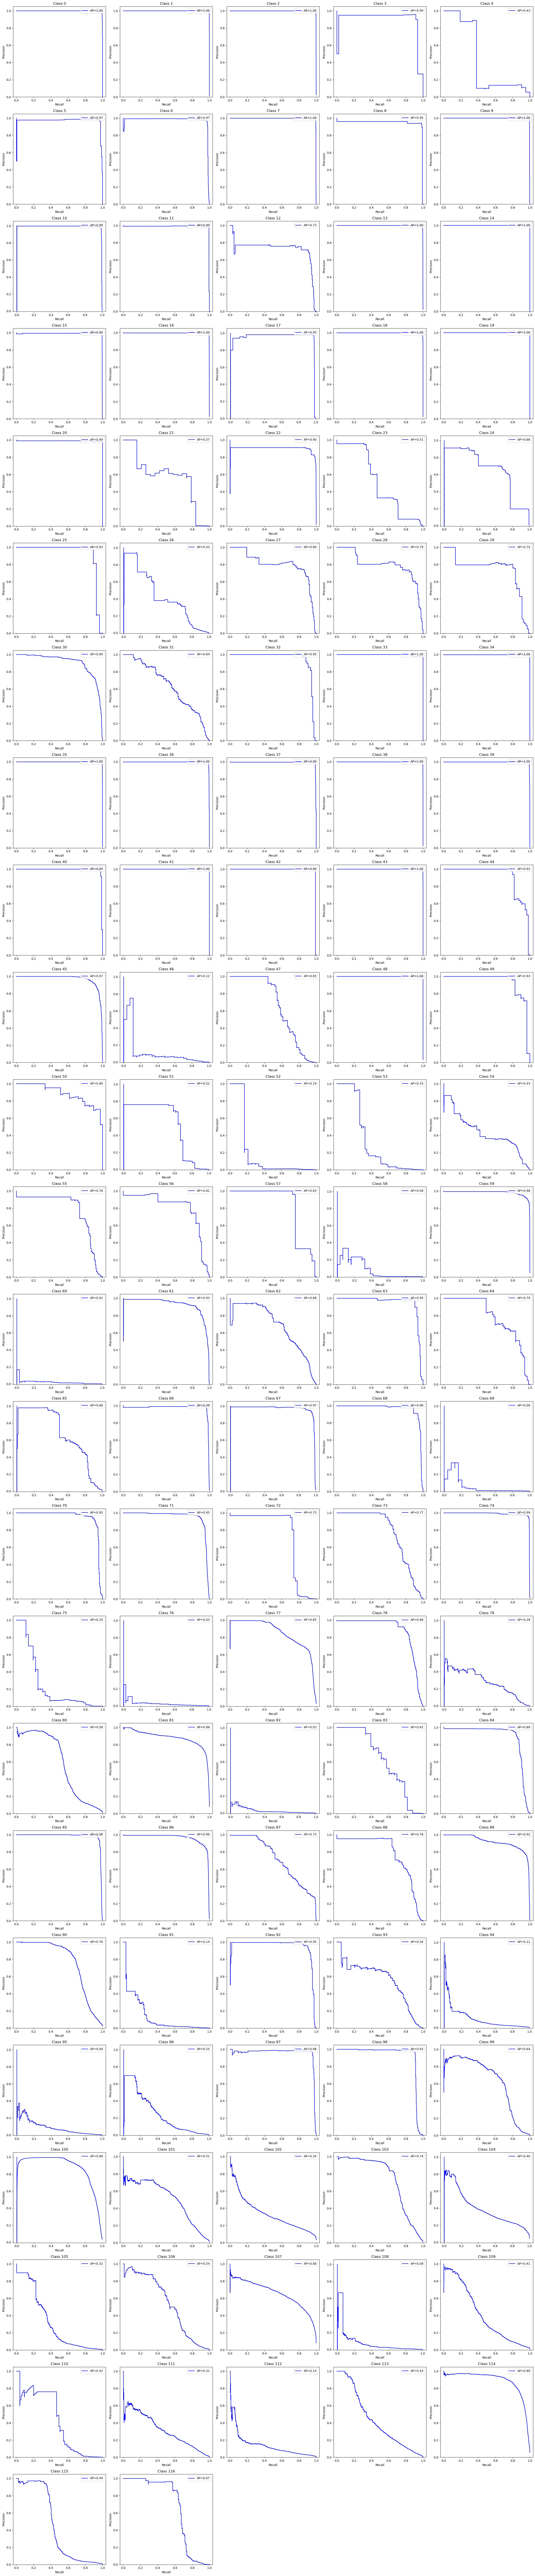

In [56]:
# Инициализация словарей
precision5 = dict()
recall5 = dict()
average_precision5 = dict()

n_classes5 = y_test_binarized5.shape[1]  # количество классов

# Расчет точности и полноты для каждого класса
for i in range(n_classes5):
    precision5[i], recall5[i], _ = precision_recall_curve(y_test_binarized5[:, i], y_score5[:, i])
    average_precision5[i] = average_precision_score(y_test_binarized5[:, i], y_score5[:, i])

# Выбор размера сетки подграфиков в зависимости от количества классов
rows5 = int(np.ceil(n_classes5 / 5))  # Допустим, мы хотим до 6 графиков в ряд
cols5 = 5

# Создание фигуры для подграфиков
figsize_per_subplot5 = 5  # Задаем желаемую ширину и высоту каждого подграфика
fig5, axes5 = plt.subplots(rows5, cols5, figsize=(figsize_per_subplot5 * cols5, figsize_per_subplot5 * rows5))

for i, ax in enumerate(axes5.flatten()):
    if i < n_classes5:
        ax.step(recall5[i], precision5[i], where='post', color='b', label=f'AP={average_precision5[i]:.2f}')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.0])
        ax.set_title(f'Class {i}')
        ax.legend(loc="upper right")
        ax.set_aspect('equal', adjustable='datalim')
    else:
        ax.set_visible(False)  # Скрываем лишние подграфики, если они есть

# Если количество классов не заполняет всю сетку, остальные подграфики можно очистить
for i in range(n_classes5, rows5 * cols5):
    fig5.delaxes(axes5.flatten()[i])

plt.tight_layout()
plt.show()


### Графики для слайдов

In [120]:
model5.classes_[104]

331229900

In [87]:
np.where(model5.classes_ == 331910000)[0][0]

115

In [100]:
def steps_from_code(okpd_kod):
    okpd_steps=[]
    if len(okpd_kod) == 9:
        okpd_steps.append(int(okpd_kod[:3]))
        okpd_steps.append(int(okpd_kod[:4]))
        okpd_steps.append(int(okpd_kod[:5]))
        okpd_steps.append(int(okpd_kod[:6]))
        okpd_steps.append(int(okpd_kod))
        
    else:
        okpd_steps.append(int(okpd_kod[:2]))
        okpd_steps.append(int(okpd_kod[:3]))
        okpd_steps.append(int(okpd_kod[:4]))
        okpd_steps.append(int(okpd_kod[:5]))
        okpd_steps.append(int(okpd_kod))
    return okpd_steps

x = steps_from_code('11342000')
x

[11, 113, 1134, 11342, 11342000]

In [101]:
def labels_binarized_from_steps(class_numbers):
    labels_bin = []
    labels_bin.append(np.where(model.classes_ == class_numbers[0])[0][0])
    labels_bin.append(np.where(model2.classes_ == class_numbers[1])[0][0])
    labels_bin.append(np.where(model3.classes_ == class_numbers[2])[0][0])
    labels_bin.append(np.where(model4.classes_ == class_numbers[3])[0][0])
    labels_bin.append(np.where(model5.classes_ == class_numbers[4])[0][0])
    return labels_bin
labels_binarized_from_steps(x)

[0, 1, 5, 10, 15]

<Figure size 640x480 with 0 Axes>

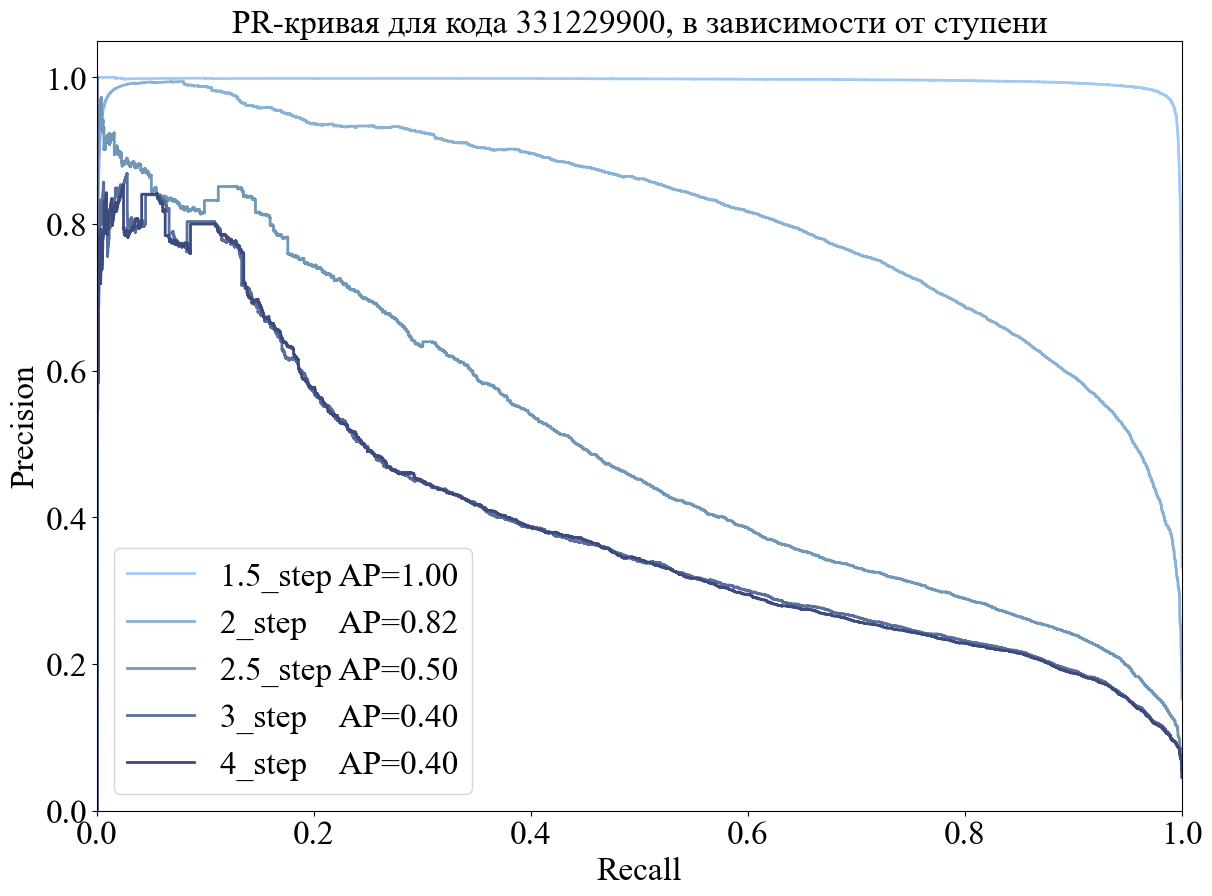

In [143]:
# Выбор номера класса для визуализации
okpd_2_code = '331229900'
class_numbers = labels_binarized_from_steps(steps_from_code(okpd_2_code))

# Построение графика кривой точности-полноты
plt.figure()
plt.figure(figsize=(14, 10))
plt.step(recall[class_numbers[0]], precision[class_numbers[0]], where='post', color='#a1c9f4', label=f'1.5_step AP={average_precision[class_numbers[0]]:.2f}')
plt.step(recall2[class_numbers[1]], precision2[class_numbers[1]], where='post', color='#89b2d5', label=f'2_step    AP={average_precision2[class_numbers[1]]:.2f}')
plt.step(recall3[class_numbers[2]], precision3[class_numbers[2]], where='post', color='#7097b8', label=f'2.5_step AP={average_precision3[class_numbers[2]]:.2f}')
plt.step(recall4[class_numbers[3]], precision4[class_numbers[3]], where='post', color='#58709b', label=f'3_step    AP={average_precision4[class_numbers[3]]:.2f}')
plt.step(recall5[class_numbers[4]], precision5[class_numbers[4]], where='post', color='#3e4a7e', label=f'4_step    AP={average_precision5[class_numbers[4]]:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR-кривая для кода %d, в зависимости от ступени' % int(okpd_2_code))
plt.legend(loc="lower left")
plt.savefig('pr_curve_1.svg', format='svg')
plt.savefig('pr_curve_1.png', format='png')
plt.show()

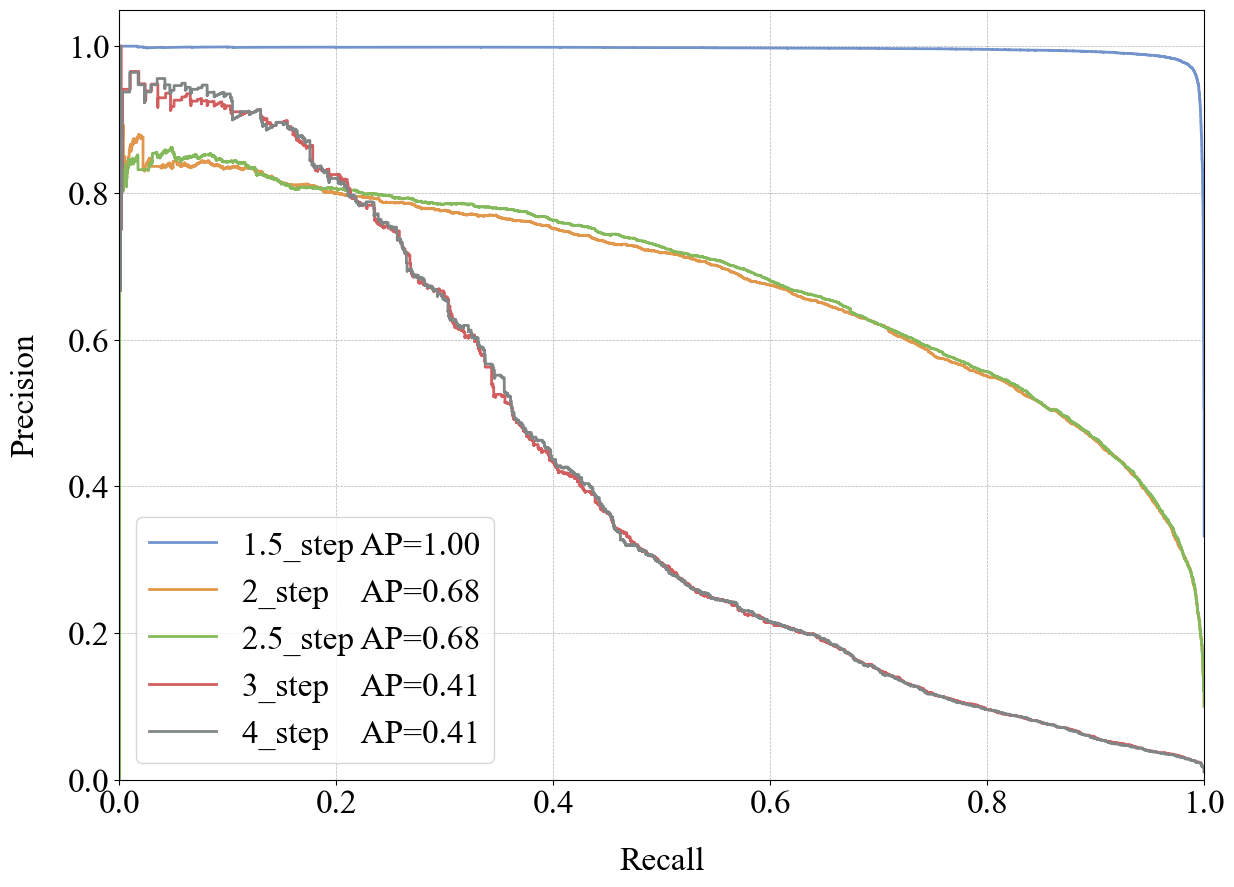

In [140]:
# Настройки для оформления графиков
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 24
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24

# Теперь устанавливаем цвета для линий
colors = ['#7293cb', '#e1974c', '#84ba5b', '#d35e60', '#808585']

# Построение графика
plt.figure(figsize=(14, 10))
plt.step(recall[class_numbers[0]], precision[class_numbers[0]], where='post', color=colors[0], label=f'1.5_step AP={average_precision[class_numbers[0]]:.2f}')
plt.step(recall2[class_numbers[1]], precision2[class_numbers[1]], where='post', color=colors[1], label=f'2_step    AP={average_precision2[class_numbers[1]]:.2f}')
plt.step(recall3[class_numbers[2]], precision3[class_numbers[2]], where='post', color=colors[2], label=f'2.5_step AP={average_precision3[class_numbers[2]]:.2f}')
plt.step(recall4[class_numbers[3]], precision4[class_numbers[3]], where='post', color=colors[3], label=f'3_step    AP={average_precision4[class_numbers[3]]:.2f}')
plt.step(recall5[class_numbers[4]], precision5[class_numbers[4]], where='post', color=colors[4], label=f'4_step    AP={average_precision5[class_numbers[4]]:.2f}')
plt.xlabel('Recall', fontsize=24, labelpad=20)
plt.ylabel('Precision', fontsize=24, labelpad=20)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left", frameon=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Сохранение графика
#plt.savefig('precision_recall_curve.svg', format='svg')
#plt.savefig('precision_recall_curve.png', format='png')
plt.show()


<Figure size 640x480 with 0 Axes>

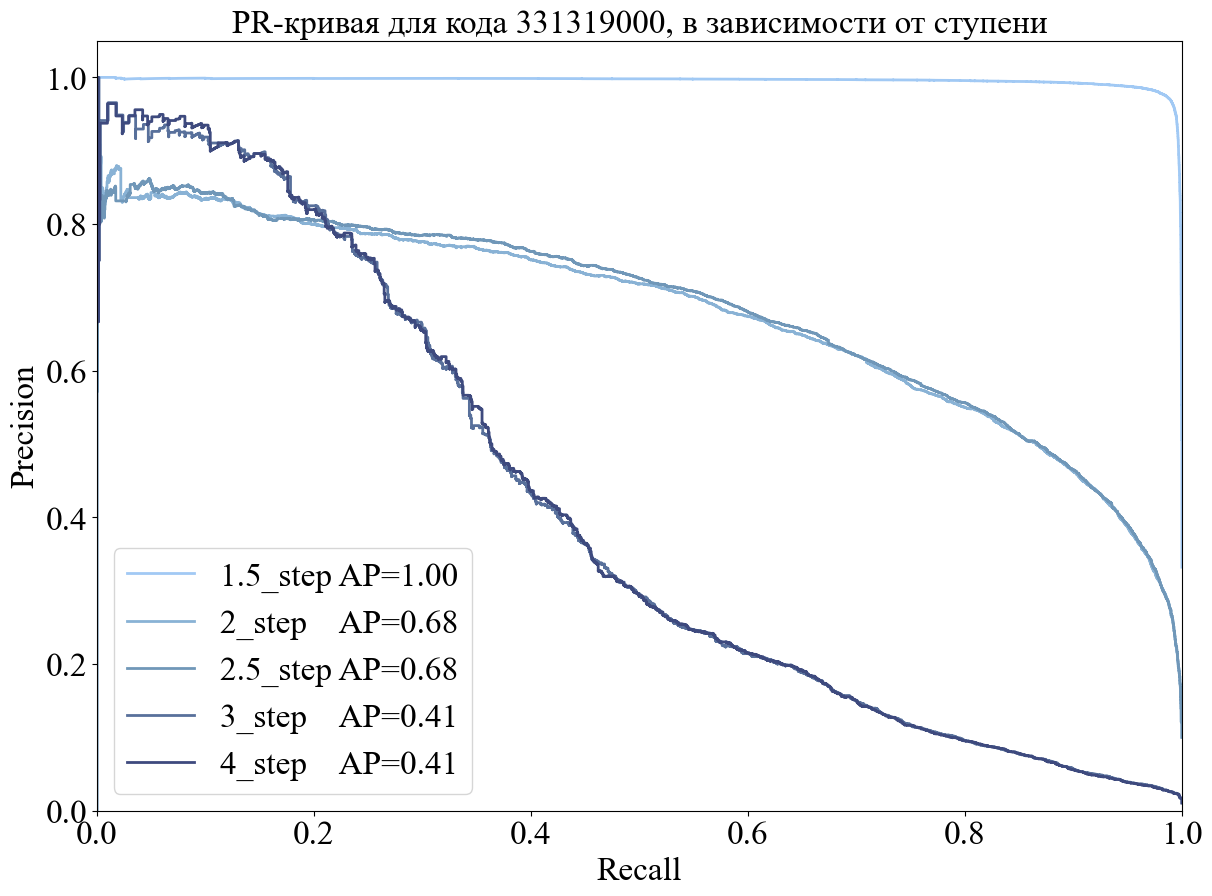

In [142]:
# Выбор номера класса для визуализации
okpd_2_code = '331319000'
class_numbers = labels_binarized_from_steps(steps_from_code(okpd_2_code))

# Построение графика кривой точности-полноты
plt.figure()
plt.figure(figsize=(14, 10))
plt.step(recall[class_numbers[0]], precision[class_numbers[0]], where='post', color='#a1c9f4', label=f'1.5_step AP={average_precision[class_numbers[0]]:.2f}')
plt.step(recall2[class_numbers[1]], precision2[class_numbers[1]], where='post', color='#89b2d5', label=f'2_step    AP={average_precision2[class_numbers[1]]:.2f}')
plt.step(recall3[class_numbers[2]], precision3[class_numbers[2]], where='post', color='#7097b8', label=f'2.5_step AP={average_precision3[class_numbers[2]]:.2f}')
plt.step(recall4[class_numbers[3]], precision4[class_numbers[3]], where='post', color='#58709b', label=f'3_step    AP={average_precision4[class_numbers[3]]:.2f}')
plt.step(recall5[class_numbers[4]], precision5[class_numbers[4]], where='post', color='#3e4a7e', label=f'4_step    AP={average_precision5[class_numbers[4]]:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR-кривая для кода %d, в зависимости от ступени' % int(okpd_2_code))
plt.legend(loc="lower left")
plt.show()

In [149]:
joblib.dump(model, '1_17_33_class_full_train_model.joblib')
joblib.dump(model2, '1_17_33_class_full_train_model2.joblib')
joblib.dump(model3, '1_17_33_class_full_train_model3.joblib')
joblib.dump(model4, '1_17_33_class_full_train_model4.joblib')
joblib.dump(model5, '1_17_33_class_full_train_model5.joblib')

['1_17_33_class_full_train_model5.joblib']